# Exploratory Data Analysis on Titanic Dataset
---


**Objective**: Perform exploratory data analysis on the Titanic dataset to uncover patterns and insights about passenger survival.

**Dataset**: Titanic: Machine Learning from Disaster (https://www.kaggle.com/c/titanic/data)

---


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

---
## Load data
---

In [56]:
titanic = pd.read_csv('/content/train.csv')

---
## Initial exploration
---

In [57]:
# Display first few rows
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [58]:
# Basic information about the dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [59]:
# Statistical summary
print(titanic.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

---
## Data Cleaning
---


In [60]:
# Check for missing values
missing_values = titanic.isnull().sum()
missing_values[missing_values > 0]

,0
Age,177
Cabin,687
Embarked,2


In [61]:
# Age - Fill with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [62]:
# Embarked - Fill with mode (most common value)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [63]:
# Cabin - Too many missing values, we'll drop this column
titanic.drop('Cabin', axis=1, inplace=True)

In [64]:
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


---
## EDA
---

In [65]:
survival_rate = titanic['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

Overall Survival Rate: 38.38%


---
## Visualizations
---

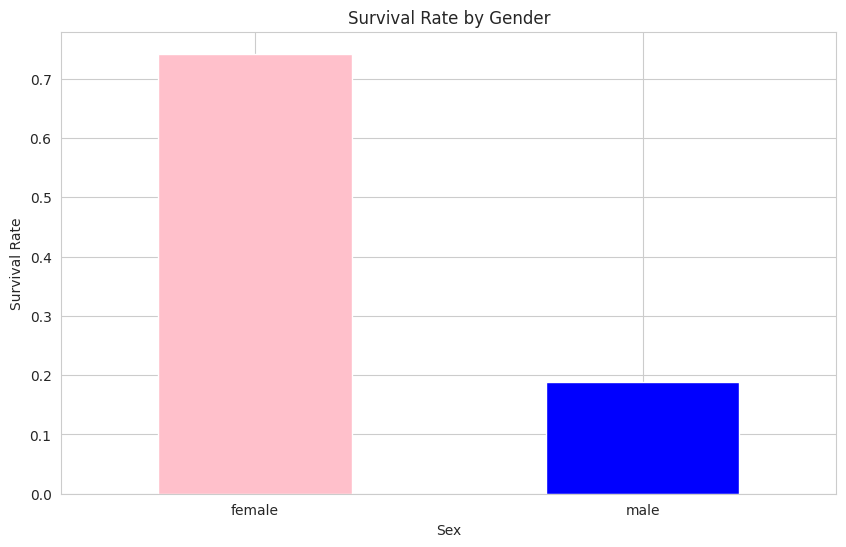

In [66]:
# Survival by gender
gender_survival = titanic.groupby('Sex')['Survived'].mean()
gender_survival.plot(kind='bar', color=['pink', 'blue'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

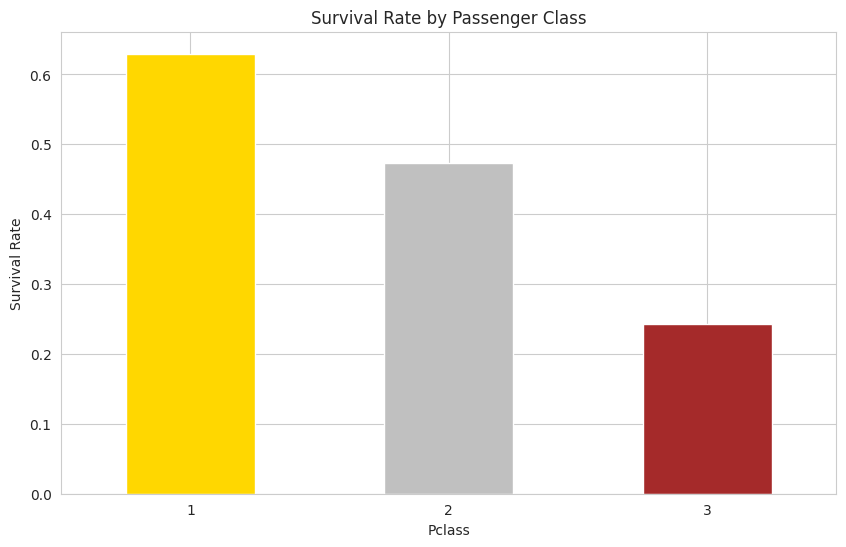

In [67]:
# Survival by class
class_survival = titanic.groupby('Pclass')['Survived'].mean()
class_survival.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

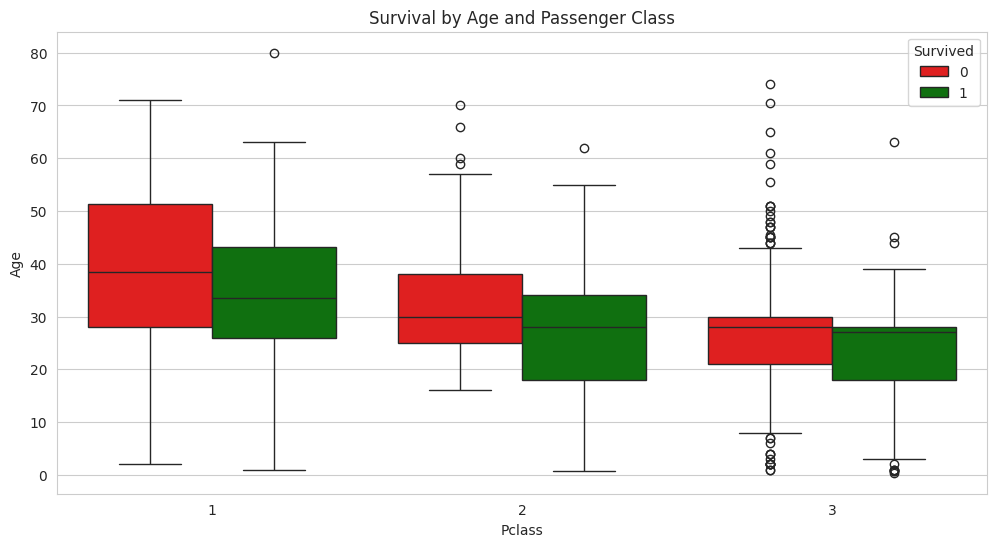

In [68]:
# Survival by age and class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic,
            palette={0: 'red', 1: 'green'})
plt.title('Survival by Age and Passenger Class')
plt.show()


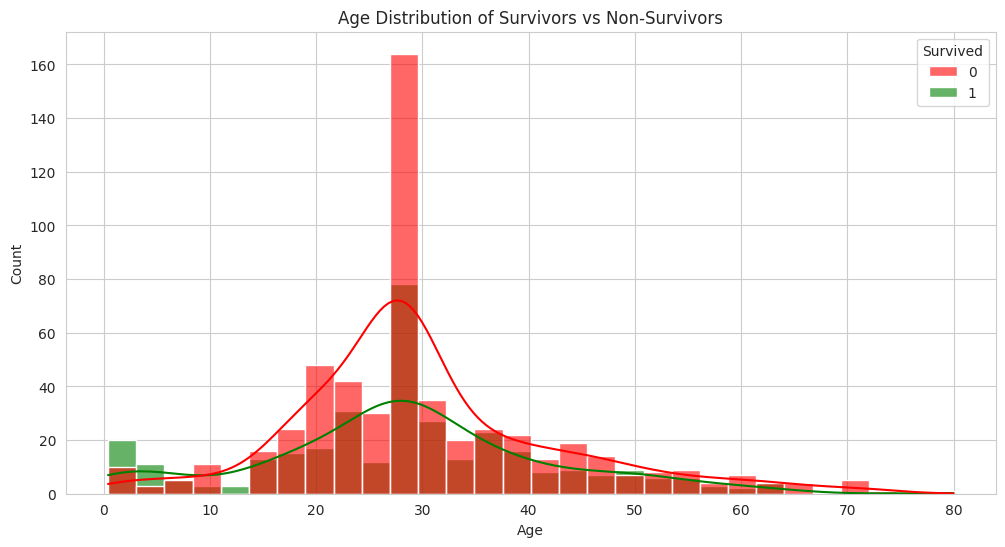

In [69]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30,
             kde=True, alpha=0.6, palette=['red', 'green'])
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

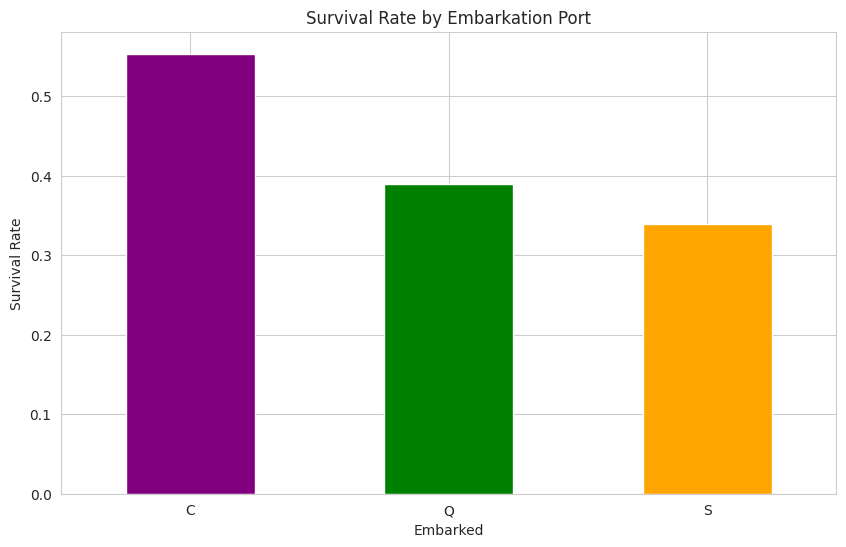

In [70]:
# Survival by embarkation port
embark_survival = titanic.groupby('Embarked')['Survived'].mean()
embark_survival.plot(kind='bar', color=['purple', 'green', 'orange'])
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

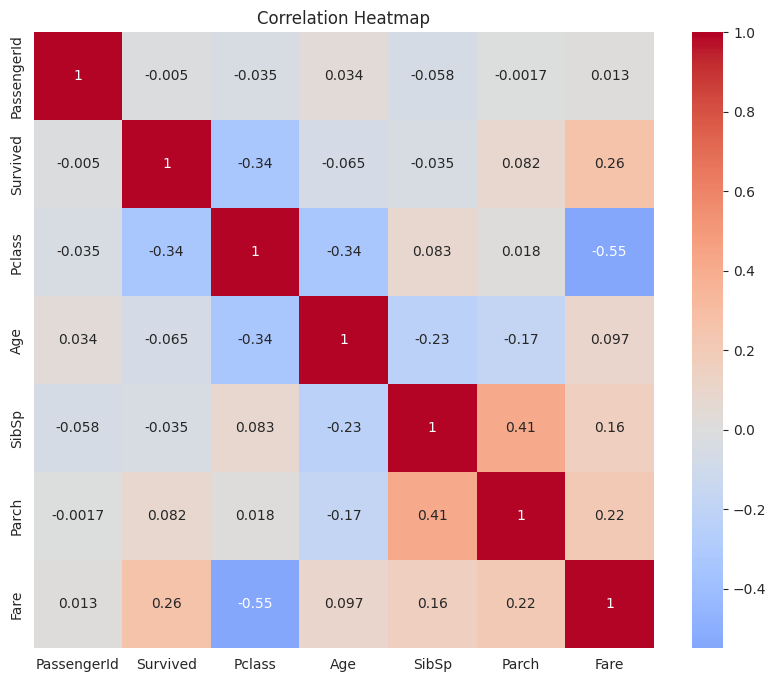

In [71]:
# Bonus: Heatmap of correlations
plt.figure(figsize=(10, 8))
numeric_cols = titanic.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

 ## Key Insights:
 1. Overall survival rate was **38.38%**
 2. **Female passengers** had significantly higher survival rates (74.2%) than males (18.9%)
 3. **First class passengers** had the highest survival rate (62.96%) compared to other classes
 4. **Children** (especially under 10) had higher survival rates
 5. Passengers who embarked at **Cherbourg (C)** had the highest survival rate